## Introduction
####  Machine learning model to detect the phishing attacks.. 

### Import the necessary packages.

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import train and test dataset

In [8]:
train=pd.read_csv("../input/techgig-hp-ml/Phising_Training_Dataset.csv")
test=pd.read_csv("../input/techgig-hp-ml/Phising_Testing_Dataset.csv")

### Structure of the train and test dataset.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

#### The above information shows that there are 8955 data entries and 32 columns.
#### The target columns is **result**.

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          2100 non-null   int64
 1   having_IP                    2100 non-null   int64
 2   URL_Length                   2100 non-null   int64
 3   Shortining_Service           2100 non-null   int64
 4   having_At_Symbol             2100 non-null   int64
 5   double_slash_redirecting     2100 non-null   int64
 6   Prefix_Suffix                2100 non-null   int64
 7   having_Sub_Domain            2100 non-null   int64
 8   SSLfinal_State               2100 non-null   int64
 9   Domain_registeration_length  2100 non-null   int64
 10  Favicon                      2100 non-null   int64
 11  port                         2100 non-null   int64
 12  HTTPS_token                  2100 non-null   int64
 13  Request_URL                  2100 non-null   int

#### The above information shows that there are 2100 data entries and 31 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [6]:
train.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

#### The above information shows that there are no missing values in train data.

In [11]:
test.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

#### The above information shows that there are no missing values in test data.

### Let's see the glimpse of train dataset

In [12]:
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Let's create a function to display the catgeorical column level counts.

In [13]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
  _=plt.figure(figsize=size)
  if switchax:
     _=sns.countplot(y=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.ylabel(col,fontsize=20)
     _=plt.yticks(fontsize=14,rotation=rot)   
  
  else:
     _=sns.countplot(x=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.xlabel(col,fontsize=20)
     _=plt.xticks(fontsize=14,rotation=rot)   
  

### Let's create a function for group by numerical summary.

In [15]:
def group_by_perc(df,grp,target):
    return df.groupby([grp,target])[target].agg({'count'}).reset_index().assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values('percentage',ascending=False)

### Let's see the distribution of target column **result**.

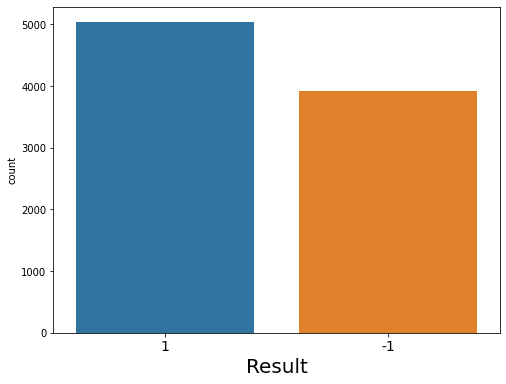

In [17]:
count_plot(train,'Result')

In [19]:
train['Result'].value_counts()

 1    5034
-1    3921
Name: Result, dtype: int64

#### The above plot explains that there is a imbalance between the classes.

### Let's see all the column's unique value and it's count.

In [20]:
for i ,col in enumerate(train.iloc[:,1:31].columns.values):
    print("="*100)
    print(f"{i}_Column Name:{col}")
    print("-"*100)
    print(f"{train[col].value_counts()}")
    print("."*100)

0_Column Name:having_IP
----------------------------------------------------------------------------------------------------
 1    5853
-1    3102
Name: having_IP, dtype: int64
....................................................................................................
1_Column Name:URL_Length
----------------------------------------------------------------------------------------------------
-1    7267
 1    1574
 0     114
Name: URL_Length, dtype: int64
....................................................................................................
2_Column Name:Shortining_Service
----------------------------------------------------------------------------------------------------
 1    7793
-1    1162
Name: Shortining_Service, dtype: int64
....................................................................................................
3_Column Name:having_At_Symbol
----------------------------------------------------------------------------------------------------
 1 

In [5]:
!pip install --user pycaret[full] -q
!pip install numba==0.53 -q

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

### Import pycaret model

In [27]:
import pycaret
from pycaret.classification import *

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

### Replace -1 as 0 in target column **Result**.

In [22]:
train['Result']=(train['Result']>0).astype('int')

### Split predictor and response variable

In [24]:
X=train.iloc[:,np.r_[1:31]]
y=train['Result']

### Create a new dataframe with concatenate the selected predictor and response variable.

In [25]:
train1=pd.concat([X,y],axis=1)

### Setup model to train

In [28]:
clf_pycaret = setup(data = train1,
                    create_clusters=True,
                    data_split_shuffle=True,
                    data_split_stratify=True,
                    fold_strategy='stratifiedkfold',
                    fold_shuffle=True,
                    fold=5,
                    normalize=True,
                    target = 'Result', session_id=112,
                    use_gpu =True,fix_imbalance=True,
                    silent=True,
                   ) 
set_config('seed', 123)

,Description,Value
0,session_id,112
1,Target,Result
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8955, 31)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare all classifier models then select the top 3 models based on the Recall.

In [29]:
top3 = compare_models(sort = 'Recall',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9643,0.9933,0.9747,0.9622,0.9684,0.9273,0.9274,1.7960
et,Extra Trees Classifier,0.9644,0.9885,0.9722,0.9648,0.9685,0.9276,0.9277,1.8480
catboost,CatBoost Classifier,0.9647,0.9951,0.9722,0.9654,0.9688,0.9283,0.9284,4.2500
lightgbm,Light Gradient Boosting Machine,0.9647,0.9946,0.9702,0.9673,0.9687,0.9283,0.9285,0.6020
dt,Decision Tree Classifier,0.9547,0.9624,0.9600,0.9595,0.9597,0.9079,0.9080,0.3840
knn,K Neighbors Classifier,0.9461,0.9846,0.9591,0.9458,0.9524,0.8902,0.8905,1.7280
gbc,Gradient Boosting Classifier,0.9475,0.9903,0.9557,0.9512,0.9534,0.8933,0.8933,1.2880
ada,Ada Boost Classifier,0.9363,0.9867,0.9509,0.9369,0.9438,0.8704,0.8706,1.0340
ridge,Ridge Classifier,0.9298,0.0000,0.9503,0.9268,0.9384,0.8568,0.8573,0.6340
lda,Linear Discriminant Analysis,0.9298,0.9822,0.9503,0.9268,0.9384,0.8568,0.8573,0.6880


### Blend the top 3 model

In [30]:
blender = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9665,0.9956,0.9787,0.9623,0.9705,0.9318,0.9320
1,0.9665,0.9958,0.9702,0.9702,0.9702,0.9320,0.9320
2,0.9681,0.9944,0.9702,0.9730,0.9716,0.9352,0.9352
3,0.9673,0.9956,0.9759,0.9662,0.9710,0.9334,0.9335
4,0.9665,0.9954,0.9787,0.9623,0.9705,0.9317,0.9319
Mean,0.9670,0.9953,0.9747,0.9668,0.9708,0.9328,0.9329
Std,0.0006,0.0005,0.0038,0.0042,0.0005,0.0014,0.0013


### Finalize the belnded model

In [31]:
final = finalize_model(blender)

In [32]:
from sklearn import set_config
set_config(display="diagram")

In [33]:
final

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=F...
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=112, verbose=0,
                                                   warm_start=False)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7fa5dabad410>)],
                 flatten_transform=True, n_jobs=1, verbose=False, voting='soft',
                 weights=None)

### Model ROC curve

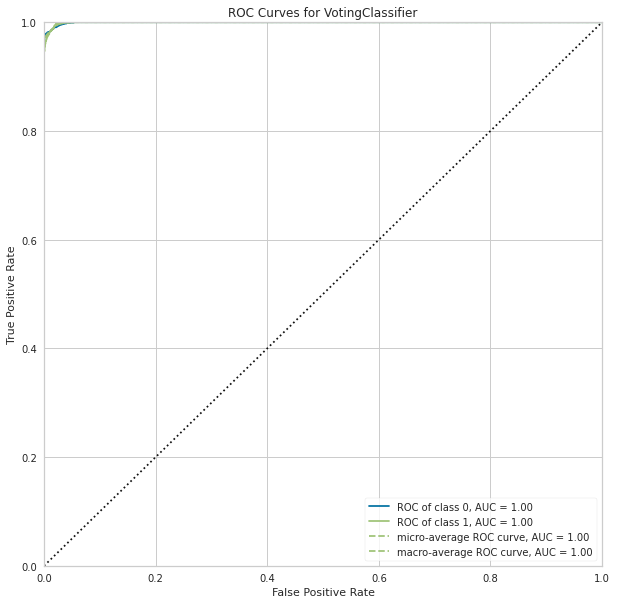

In [34]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'auc')

### Model precision and recall curve

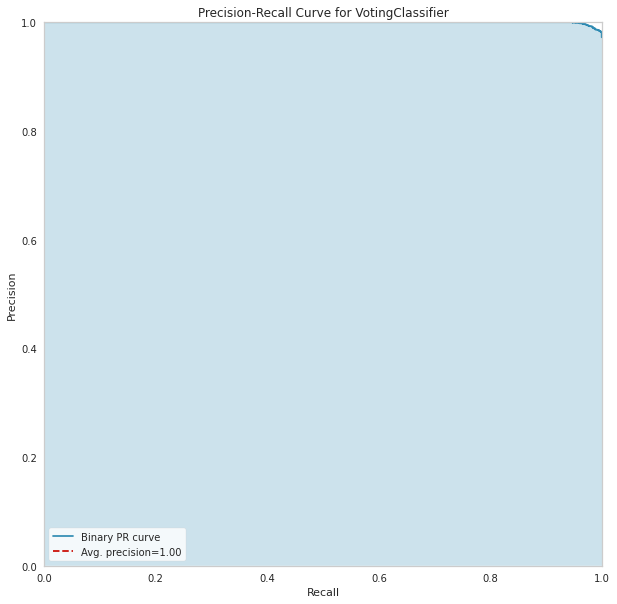

In [35]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'pr')

### Model confusion matrix for hold out data

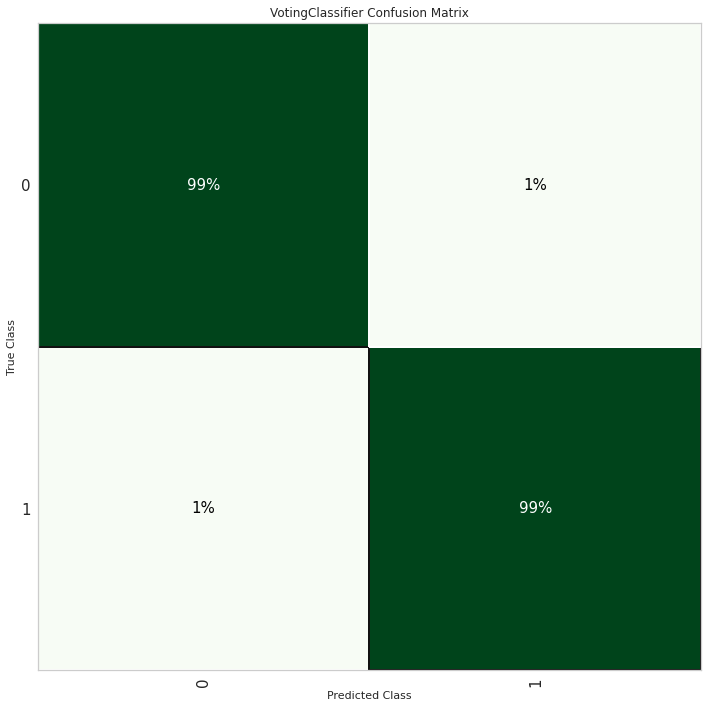

In [36]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'confusion_matrix',use_train_data = False, plot_kwargs = {'percent' : True})

### Error plot

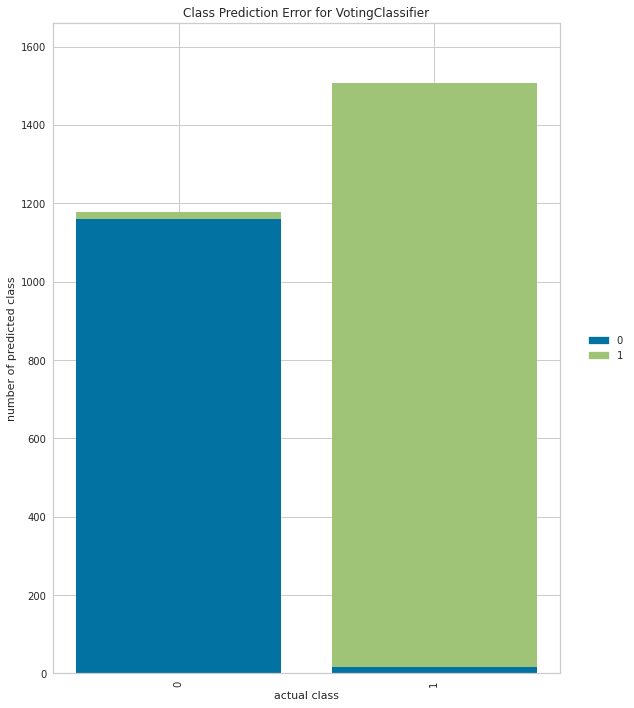

In [37]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'error')

### Random forest model feature importance plot

<Figure size 720x720 with 0 Axes>

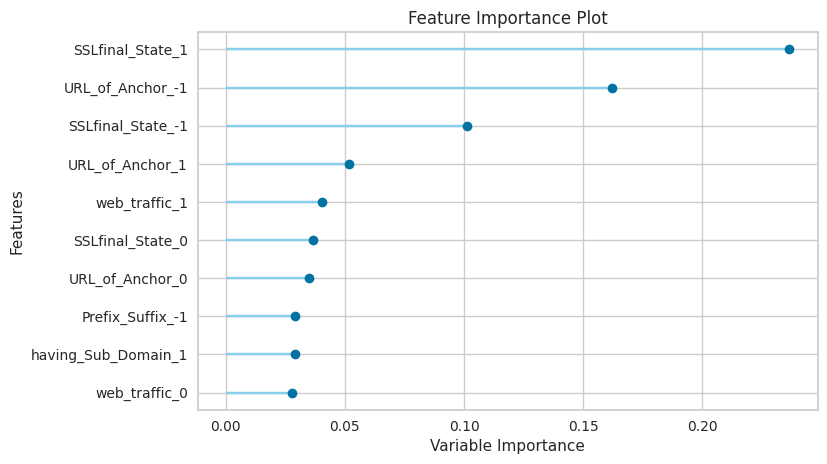

In [38]:
plt.figure(figsize = (10,10))
plot_model(final.named_estimators_[list(final.named_estimators)[0]], plot = 'feature')

### SHAP feature importance plot

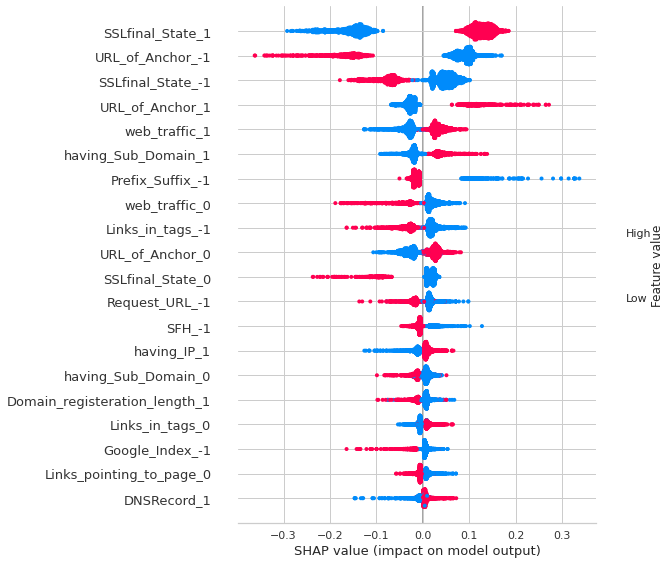

In [39]:
interpret_model(final.named_estimators_[list(final.named_estimators)[0]])

### Validation curve for random forest model

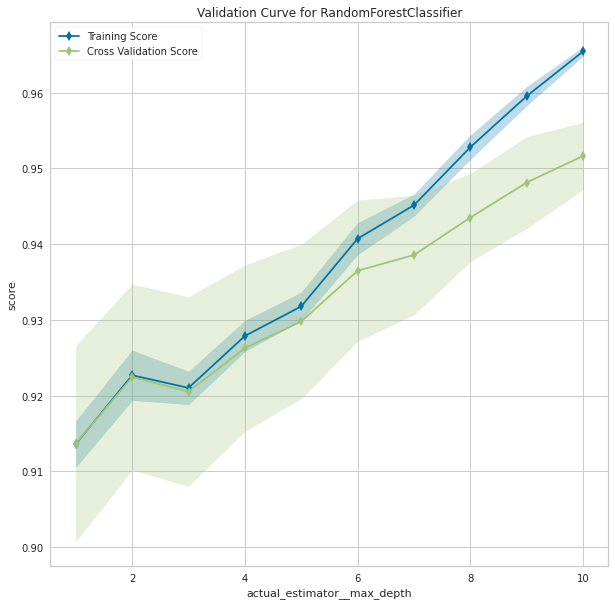

In [40]:
plt.figure(figsize = (10,10))
plot_model(final.named_estimators_[list(final.named_estimators)[0]], plot = 'vc')

### Predict the test data by using finalized blended model

In [41]:
test['Result']=(predict_model(final, data=test.loc[:,X.columns])['Label'])

### Create a result dataframe

In [42]:
res=pd.DataFrame({'key':test['key'],'Result':test['Result']})

### Replace 0 as -1

In [43]:
res=res.replace({'Result':{0:-1}})

### Write the result dataframe to csv

In [44]:
res.to_csv("pycaret_blend_final.csv",index=False)